# **ЗАДАНИЕ 3. ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА ДАННЫХ И ОТБОР ПРИЗНАКОВ**

На основе данных о диабете индейцев пима проведите предварительную обработку данных и отбор признаков.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
from pandas import read_csv

In [ ]:
from numpy import set_printoptions

In [ ]:
from sklearn.preprocessing import MinMaxScaler # масштабирует в интервал от 0 до 1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/наборы данных/')

**Методика выполнения задания:**

# **Раздел 1. Предварительная обработка данных**

**ДАТАСЕТ С ГРИБАМИ**

**1.Укажите путь к рабочей папке, где хранятся данные, с помощью функции chdir() из модуля os.**

**2. Загрузите данные файла pima-indians-diabetes.data.csv с помощью функции read_csv() из модуля pandas. Посмотрите на первые 5 наблюдений с помощью функции head().**

In [ ]:
filename='agaricus-lepiota.data'
names=['class', 'cap_shape', 'cap_surface','cap_color', 'bruises', 'odor', 'gill_attachment',
'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape',
'stalk_root', 'stalk_surface_above_ring',
'stalk_surface_below_ring', 'stalk_color_above_ring',
'stalk_color_below_ring', 'veil_type', 'veil_color',
'ring_number', 'ring_type', 'spore_print_color',
'population', 'habitat']
df=read_csv(filename,names=names)
df
# p - отравлен, e - здоров

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])
df
# 1 - отравлен, 0 - здоров

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [ ]:
df.dtypes

class                       int64
cap_shape                   int64
cap_surface                 int64
cap_color                   int64
bruises                     int64
odor                        int64
gill_attachment             int64
gill_spacing                int64
gill_size                   int64
gill_color                  int64
stalk_shape                 int64
stalk_root                  int64
stalk_surface_above_ring    int64
stalk_surface_below_ring    int64
stalk_color_above_ring      int64
stalk_color_below_ring      int64
veil_type                   int64
veil_color                  int64
ring_number                 int64
ring_type                   int64
spore_print_color           int64
population                  int64
habitat                     int64
dtype: object

**3. Сохраните в переменную array значения признаков, обратившись к атрибуту values.**

In [ ]:
array = df.values
array

array([[1, 5, 2, ..., 2, 3, 5],
       [0, 5, 2, ..., 3, 2, 1],
       [0, 0, 2, ..., 3, 2, 3],
       ...,
       [0, 2, 2, ..., 0, 1, 2],
       [1, 3, 3, ..., 7, 4, 2],
       [0, 5, 2, ..., 4, 1, 2]])

**4. Выделите в переменной array часть, которая относится к факторным**

 **признакам, назовите ее X, и часть, которая относится к результативному**

**признаку, - Y. Прокомментируйте содержимое переменных X и Y.**

In [ ]:
X = array[:,1:] # факторные признаки, т.е. параметры объекта
Y = array[:,0] # результативные признак, т.е. сам объект
# это обучение с учителем х - это данные, y - это ответ

In [ ]:
Y

array([1, 0, 0, ..., 0, 1, 0])

**5. Проведите масштабирование факторных признаков на отрезок [0,1]. Для этого сначала создайте соответствующий объект с помощью функции MinMaxScaler() из модуля sklearn.preprocessing. Потом обучите его на факторных признаках и преобразуйте данные с помощью функции fit_transform().**

In [ ]:
from pandas.core.apply import FrameApply
scaler=MinMaxScaler(feature_range=(0,1)) # feature_range=(0,1) - можно не писать, по умолчанию берется
# создали функцию масштабирования данных в (0,1) и загнали ее в переменную scaler

In [ ]:
rescaledX=scaler.fit_transform(X)
# все наборы признаков масштабировали в от 0 до 1 и записали в переменную rescaledX

In [ ]:
rescaledX[0:5,:] # просмотр данных

array([[1.        , 0.66666667, 0.44444444, 1.        , 0.75      ,
        1.        , 0.        , 1.        , 0.36363636, 0.        ,
        0.75      , 0.66666667, 0.66666667, 0.875     , 0.875     ,
        0.        , 0.66666667, 0.5       , 1.        , 0.25      ,
        0.6       , 0.83333333],
       [1.        , 0.66666667, 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.36363636, 0.        ,
        0.5       , 0.66666667, 0.66666667, 0.875     , 0.875     ,
        0.        , 0.66666667, 0.5       , 1.        , 0.375     ,
        0.4       , 0.16666667],
       [0.        , 0.66666667, 0.88888889, 1.        , 0.375     ,
        1.        , 0.        , 0.        , 0.45454545, 0.        ,
        0.5       , 0.66666667, 0.66666667, 0.875     , 0.875     ,
        0.        , 0.66666667, 0.5       , 1.        , 0.375     ,
        0.4       , 0.5       ],
       [1.        , 1.        , 0.88888889, 1.        , 0.75      ,
        1.       

**6. Установите формат представления данных вида 3 знака после запятой, воспользовавшись функцией set_printoptions() из модуля numpy.**

In [ ]:
set_printoptions(precision=3) # округляем данные до 3-х знаков после запятой

**7. Выведите на экран первые 5 строк преобразованных данных.**

In [ ]:
rescaledX[0:5,:]

array([[1.   , 0.667, 0.444, 1.   , 0.75 , 1.   , 0.   , 1.   , 0.364,
        0.   , 0.75 , 0.667, 0.667, 0.875, 0.875, 0.   , 0.667, 0.5  ,
        1.   , 0.25 , 0.6  , 0.833],
       [1.   , 0.667, 1.   , 1.   , 0.   , 1.   , 0.   , 0.   , 0.364,
        0.   , 0.5  , 0.667, 0.667, 0.875, 0.875, 0.   , 0.667, 0.5  ,
        1.   , 0.375, 0.4  , 0.167],
       [0.   , 0.667, 0.889, 1.   , 0.375, 1.   , 0.   , 0.   , 0.455,
        0.   , 0.5  , 0.667, 0.667, 0.875, 0.875, 0.   , 0.667, 0.5  ,
        1.   , 0.375, 0.4  , 0.5  ],
       [1.   , 1.   , 0.889, 1.   , 0.75 , 1.   , 0.   , 1.   , 0.455,
        0.   , 0.75 , 0.667, 0.667, 0.875, 0.875, 0.   , 0.667, 0.5  ,
        1.   , 0.25 , 0.6  , 0.833],
       [1.   , 0.667, 0.333, 0.   , 0.625, 1.   , 1.   , 0.   , 0.364,
        1.   , 0.75 , 0.667, 0.667, 0.875, 0.875, 0.   , 0.667, 0.5  ,
        0.   , 0.375, 0.   , 0.167]])

**8. Проведите стандартизацию факторных признаков. Для этого сначала создайте соответствующий объект с помощью функции StandardScaler() из модуля sklearn.preprocessing. Потом обучите его на факторных признаках с помощью функции fit() и преобразуйте данные с помощью функции transform(). Выведите на экран первые 5 строк преобразованных**

факторные признаки - это свойства объекта, унас X

!!!грубо говоря приводим данные к виду, когда среднее =0, а стандартное отклонение = 1

**Т.е. масштаб у всех признаков одинаковый**

In [ ]:
scaler=StandardScaler().fit(X) # создали объект и обучили его

In [ ]:
rescaledX=scaler.transform(X) # делаем среднее =0, а стандартное отклонение = 1

In [ ]:
rescaledX[0:5,:] # форэкзампел

array([[ 1.03 ,  0.14 , -0.198,  1.186,  0.882,  0.163, -0.439,  1.495,
        -0.229, -1.145,  1.781,  0.684,  0.586,  0.622,  0.632,  0.   ,
         0.142, -0.256,  0.948, -0.67 , -0.514,  2.03 ],
       [ 1.03 ,  0.14 ,  1.766,  1.186, -1.97 ,  0.163, -0.439, -0.669,
        -0.229, -1.145,  0.839,  0.684,  0.586,  0.622,  0.632,  0.   ,
         0.142, -0.256,  0.948, -0.25 , -1.313, -0.296],
       [-2.087,  0.14 ,  1.373,  1.186, -0.544,  0.163, -0.439, -0.669,
         0.053, -1.145,  0.839,  0.684,  0.586,  0.622,  0.632,  0.   ,
         0.142, -0.256,  0.948, -0.25 , -1.313,  0.867],
       [ 1.03 ,  0.953,  1.373,  1.186,  0.882,  0.163, -0.439,  1.495,
         0.053, -1.145,  1.781,  0.684,  0.586,  0.622,  0.632,  0.   ,
         0.142, -0.256,  0.948, -0.67 , -0.514,  2.03 ],
       [ 1.03 ,  0.14 , -0.591, -0.843,  0.407,  0.163,  2.279, -0.669,
        -0.229,  0.874,  1.781,  0.684,  0.586,  0.622,  0.632,  0.   ,
         0.142, -0.256, -1.272, -0.25 , -2.911, -0.2

**9. Проведите нормализацию факторных признаков. Для этого сначала создайте соответствующий объект с помощью функции Normalizer() из модуля sklearn.preprocessing. Потом обучите его на факторных признаках с помощью функции fit() и преобразуйте данные с помощью функции transform(). Выведите на экран первые 5 строк преобразованных данных.**


отступление:

**Нормализация** подразумевает изменение диапазонов в данных без изменения формы распределения,

**Стандартизация** изменяет форму распределения данных (приводится к нормальному распределению).

# **простое объяснение:**
Обычно достаточно **нормализовать** данные. Например, в глубоком обучении (Deep Learning) требуется перевести цвета изображений RGB из диапазона 0-255 к диапазону 0-1. А вот **стандартизацию** стоит применять при использование алгоритмов, которые основываются на измерении расстояний, например, *k ближайших соседей или метод опорных векторов* (SVM).

In [ ]:
scaler=Normalizer().fit(X) # создаем объект, обучаем

In [ ]:
normalizedX=scaler.transform(X) #  делает данные нормализованными

In [ ]:
normalizedX[0:5,:]

array([[0.302, 0.121, 0.242, 0.06 , 0.362, 0.06 , 0.   , 0.06 , 0.242,
        0.   , 0.181, 0.121, 0.121, 0.423, 0.423, 0.   , 0.121, 0.06 ,
        0.242, 0.121, 0.181, 0.302],
       [0.303, 0.121, 0.545, 0.061, 0.   , 0.061, 0.   , 0.   , 0.242,
        0.   , 0.121, 0.121, 0.121, 0.424, 0.424, 0.   , 0.121, 0.061,
        0.242, 0.182, 0.121, 0.061],
       [0.   , 0.125, 0.499, 0.062, 0.187, 0.062, 0.   , 0.   , 0.312,
        0.   , 0.125, 0.125, 0.125, 0.437, 0.437, 0.   , 0.125, 0.062,
        0.25 , 0.187, 0.125, 0.187],
       [0.273, 0.164, 0.436, 0.055, 0.327, 0.055, 0.   , 0.055, 0.273,
        0.   , 0.164, 0.109, 0.109, 0.382, 0.382, 0.   , 0.109, 0.055,
        0.218, 0.109, 0.164, 0.273],
       [0.343, 0.137, 0.206, 0.   , 0.343, 0.069, 0.069, 0.   , 0.275,
        0.069, 0.206, 0.137, 0.137, 0.481, 0.481, 0.   , 0.137, 0.069,
        0.   , 0.206, 0.   , 0.069]])

**10. Проведите бинарное кодирование факторных признаков так, чтобы значение признака, большее 0, стало равным 1. Для этого сначала создайте соответствующий объект с помощью функции Binarizer(threshold=0.0) из модуля sklearn.preprocessing. Потом обучите его на факторных признаках с помощью функции fit() и преобразуйте данные с помощью функции transform(). Выведите на экран первые 5 строк преобразованных данных.**


In [ ]:
binarizer=Binarizer(threshold=0.0).fit(X) # создаем и обучаем объект

In [ ]:
binaryX=binarizer.transform(X) # преобразуем в бинарный вид

In [ ]:
binaryX[0:5,:]

array([[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]])

# **Раздел 2. Отбор признаков**

**11. Проведите отбор 4 наиболее значимых признаков на основе F-критерия в дисперсионном анализе. Для этого сначала создайте соответствующий объект с помощью функции SelectKBest(score_func=f_classif, k=4) из модуля sklearn.feature_selection. Потом обучите его на переменных X и Y с помощью функции fit(). Выведите на экран значения F-критерия для всех признаков, обратившись**

Проще говоря:
**f-критерий** - сравнивает 2 объекта по одному признаку (столбцу) и чем этот критерий выше, тем больше различие признаков

т.е. в этом задании мы из 8 признаков выбираеи 4 признака, которые будут иметь максимальный f-критерий, находим 4 признака, которые **max** будут различать объекты

In [ ]:
test=SelectKBest(score_func=f_classif, k=4) # создание объекта

In [ ]:
fit=test.fit(X,Y) # обучаем объект

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
fit.scores_ # выводим f-критерии, чем тольше значение, тем больше различие признаков

array([  22.836,  267.135,    8.008, 2729.51 ,   71.711,  137.879,
       1121.972, 3343.7  , 3182.113,   85.422, 1365.373, 1023.905,
        796.236,  197.308,  178.712,      nan,  174.781,  391.207,
       1658.306,  247.491,  795.563,  402.053])

**12. Преобразуйте факторные признаки с помощью функции transform(). Выведите на экран первые 5 строк преобразованных данных.**


In [ ]:
features=fit.transform(X) # вытаскивает из набора те признаки для которых f-критерии максимальные,
                          # ранее мы задали их 4 штуки

In [ ]:
features[0:5,:]

array([[1, 1, 4, 4],
       [1, 0, 4, 4],
       [1, 0, 5, 4],
       [1, 1, 5, 4],
       [0, 0, 4, 0]])

**13. Проводите рекурсивное исключение наименее значимых признаков до тех пор, пока не останется 3 признака. Отбор осуществляйте на основе модели логистической регрессии. Сначала создайте модель с помощью функции LogisticRegression() из модуля sklearn.linear_model.**


In [ ]:
model=LogisticRegression(solver='liblinear') # алгоритм оптимизации(создание объекта для модели регрессии)

**14. Затем с помощью функции RFE() из модуля sklearn.feature_selection создайте объект для рекурсивного исключения признаков, подав ему на вход созданную модель логистической регрессии и количество отбираемых признаков (n_features_to_select=3).**


In [ ]:
rfe=RFE(model,n_features_to_select=4)

**15. Обучите созданный объект на переменных X и Y с помощью функции fit().**


In [ ]:
fit=rfe.fit(X,Y)

**16. Выведите на экран число отобранных признаков, обратившись к параметру n_features_.**


In [ ]:
fit.n_features_

4

**17. Выведите на экран логическое указание на отобранные признаки из всего набора, обратившись к параметру support_.**

In [ ]:
fit.support_ # определяет 3 наиболее значимых признака в бинарной форме

array([False, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False])

**18. Выведите на экран ранги признаков, обратившись к параметру ranking_.**


In [ ]:
fit.ranking_ # указывает признаки по значимости

array([16,  8, 15,  7,  4,  2,  1,  1, 13, 18,  3,  1, 11, 12, 17, 19,  1,
        5,  6, 10,  9, 14])

**19. Проведите отбор 3-х главных компонент. Для этого сначала создайте соответствующий объект с помощью функции PCA(n_components=3) из модуля sklearn.decomposition.**


In [ ]:
rfe.fit_transform(X,Y) # выводим 3 главных признака, т.е. признааки в которых f-критерий максимален

array([[0, 1, 2, 2],
       [0, 0, 2, 2],
       [0, 0, 2, 2],
       ...,
       [0, 0, 2, 1],
       [0, 1, 2, 2],
       [0, 0, 2, 1]])

In [ ]:
pca=PCA(n_components=3) # создаем объект

**20. Обучите его на факторных признаках с помощью функции fit().**


In [ ]:
fit=pca.fit(X)

**21. Выведите на экран долю объясненной 3-мя компонентами дисперсии, обратившись к параметру explained_variance_ratio_.**


**!!!** сначала идут компоненты с наибольшой диспперсией

In [ ]:
fit.explained_variance_ratio_ # вывод: основная первая компонента, ее достаточно

array([0.338, 0.166, 0.123])

**22. Выведите на экран главные компонентные нагрузки, обратившись к параметру components_.**


**компонентные нагрузки** - это коэффициент корреляции между признаками и главными компонентами(ответами)

In [ ]:
fit.components_

array([[-0.005,  0.064, -0.194, -0.063,  0.207,  0.003, -0.003,  0.073,
        -0.767,  0.04 , -0.114, -0.023, -0.03 ,  0.086,  0.088, -0.   ,
         0.004,  0.003, -0.325,  0.411, -0.014,  0.104],
       [ 0.008, -0.002,  0.623, -0.044, -0.458,  0.006, -0.007, -0.018,
        -0.464, -0.074,  0.07 , -0.063, -0.066, -0.165, -0.151,  0.   ,
         0.007, -0.019, -0.053, -0.323,  0.006,  0.086],
       [ 0.084, -0.047, -0.495, -0.024, -0.044, -0.003, -0.056, -0.033,
        -0.114,  0.009, -0.135, -0.039, -0.044, -0.546, -0.546, -0.   ,
        -0.004, -0.021, -0.028, -0.217,  0.224, -0.099]])

In [ ]:
pca.fit_transform(X) # переводит среднее в 0? штоли

array([[ 0.228, -0.345, -1.424],
       [-1.937,  4.797, -3.512],
       [-1.654,  2.464, -3.881],
       ...,
       [-1.861,  0.47 ,  1.19 ],
       [ 7.293, -1.252, -1.242],
       [-4.836, -3.584, -0.113]])

**23. Примените классификатор дополнительных деревьев для отбора признаков, воспользовавшись встроенным в них механизмом расчета критериев информативности при поиске, по какому признаку осуществлять разбиение. Для этого сначала создайте соответствующий объект с помощью функции ExtraTreesClassifier(n_estimators=100) из модуля sklearn.ensemble.**

In [ ]:
model=ExtraTreesClassifier(n_estimators=100)

**24. Обучите его на переменных X и Y с помощью функции fit().**


In [ ]:
model.fit(X,Y)

ExtraTreesClassifier()

**25. Выведите на экран значения критерия информативности для каждого признака, обратившись к параметру feature_importances_.**


In [ ]:
model.feature_importances_

array([0.005, 0.018, 0.012, 0.101, 0.118, 0.003, 0.048, 0.137, 0.064,
       0.051, 0.068, 0.049, 0.044, 0.015, 0.015, 0.   , 0.004, 0.019,
       0.095, 0.053, 0.047, 0.034])

# **ЗАДАНИЕ 4. ФАКТОРНЫЙ АНАЛИЗ**

На основе данных о поведении самцов корюшки проведите факторный анализ.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.

In [ ]:
!pip install factor_analyzer

     |████████████████████████████████| 41 kB 348 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=0c9e19a55d3c2bdedd3ce5e38c86fe8664bb1d59f1757a42a35aee9dd4a48574
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


**2 метода понижения размерности:**
1. компонентный метод и
2. факторный анализ

!!! сначала применяем 1., а потом 2.

In [ ]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer import factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt

**Методика выполнения задания:**

# **Раздел 1. Предварительный анализ данных**

**1. Укажите путь к рабочей папке, где хранятся данные, с помощью функции chdir() из модуля os.**


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-200')

**2. Загрузите данные файла stickleback.csv с помощью функции read_csv() из модуля pandas. Посмотрите на первые 5 наблюдений с помощью функции head().**

In [ ]:
df=pd.read_csv('stickleback.csv',sep=';',decimal=',')
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**3. Очистите данные от шума с помощью функции filter(regex='^(?!.*Unnamed).*$'). Посмотрите на первые 5 наблюдений с помощью функции head().**

In [ ]:
df=df.filter(regex='^(?!.*Unnamed).*$') # очистка от столбцов 'unnamed'
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0


**4. Посмотрите на описательные статистики с помощью функции describe(). Прокомментируйте результат.**

In [ ]:
df.describe()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,131.185185,69.055556,7.277778,1.425926,18.425926,34.259259,89.314815
std,50.771064,43.428283,6.693891,3.000641,8.712606,56.491170,98.679742
min,41.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000
25%,99.000000,34.250000,2.250000,0.000000,14.000000,0.000000,23.500000
50%,127.000000,60.000000,5.000000,0.000000,16.000000,0.000000,45.000000
75%,156.750000,84.250000,10.750000,1.000000,24.750000,73.000000,125.000000
max,277.000000,175.000000,26.000000,15.000000,46.000000,199.000000,306.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LUNGES   54 non-null     float64
 1   BITES    54 non-null     float64
 2   ZIGZAGS  54 non-null     float64
 3   NEST     54 non-null     float64
 4   SPINES   54 non-null     float64
 5   DNEST    54 non-null     float64
 6   BOUT     54 non-null     float64
dtypes: float64(7)
memory usage: 3.1 KB


**5. Выведите на экран корреляционную матрицу с помощью функции corr(). Прокомментируйте результат.**

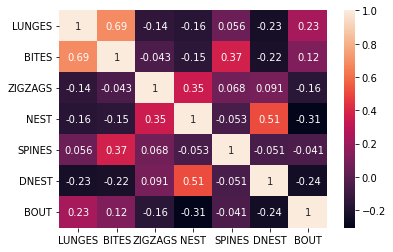

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot = True)
plt.show()

**6. Выведите на экран диаграмму рассеяния с помощью функции scatter_matrix() из модуля pandas.plotting. Сделайте вывод о нормальности распределения признаков, о наличии взаимосвязей между ними.**

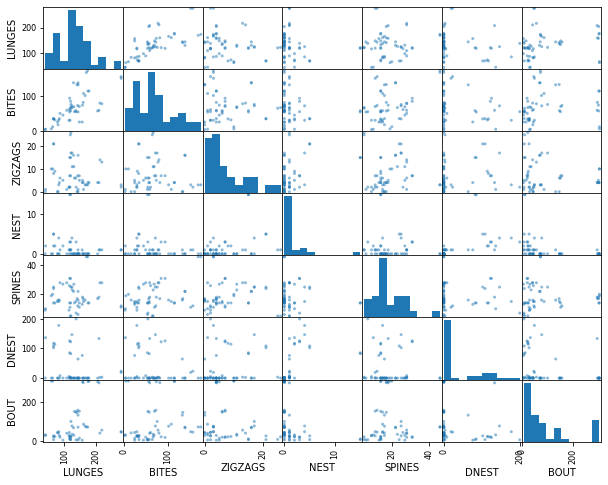

In [ ]:
scatter_matrix(df,figsize=(10,8));

**7. Рассчитайте критерий сферичности Бартлетта с помощью функции calculate_bartlett_sphericity() из модуля factor_analyzer пакета factor_analyzer. Сделайте вывод о надежности отличия корреляционной матрицы от единичной.**

факторный анализ возможен если:
1. наблюдается высокая корреляция

In [ ]:
# находит хи квадрат и p-value
chi,p_value=calculate_bartlett_sphericity(df)
chi,p_value

# p-value - очень мал, поэтому нулевую гипотезу о равенстве нашей матрицы и единичной
# мы отвергаем и это говорит о том что наша матрица сильно отличается от нулевой
# значит признаки всетаки взаимосвязаны

(85.17614839099767, 1.0820712955339398e-09)

**8. Рассчитайте меру адекватности выборки Кайзера-Мейера-Олкина индивидуально для каждой переменной (kmo_all) и в целом для модели (kmo_model) с помощью функции calculate_kmo() из модуля factor_analyzer пакета factor_analyzer. Прокомментируйте результат.**

In [ ]:
kmo_all, kmo_model = calculate_kmo(df)

In [ ]:
kmo_model

0.5267816347722194

In [ ]:
kmo_all # метод позволяет отбросить наименее значимые признаки
# что больше 0.5, то подходит

array([0.49517671, 0.48565545, 0.53685554, 0.57271819, 0.33768629,
       0.61639292, 0.76130941])

# **Раздел 2. Выделение первоначальных факторов методом главных компонент**


**9. Стандартизируйте переменные с помощью функции scale() из модуля preprocessing пакета sklearn. Посмотрите на первые 5 наблюдений.**

In [ ]:
df_scaled=preprocessing.scale(df)

In [ ]:
df_scaled[0:5,:]

array([[-1.03750432, -1.02396939, -1.09743575, -0.47966932, -0.39690707,
        -0.61214787, -0.4532939 ],
       [ 0.09572432, -0.25696079, -0.19267956, -0.47966932, -0.39690707,
        -0.61214787,  0.60028766],
       [-0.32178097, -0.90775596, -0.79585035, -0.14327785, -1.09203081,
        -0.52280737, -0.61695706],
       [-0.04344411,  1.62569667,  1.31524742, -0.47966932,  0.41407062,
        -0.61214787, -0.20779917],
       [-0.22237495, -0.25696079,  1.16445472,  4.56620276, -0.51276103,
         0.85303633, -0.82153601]])

**10. Создайте объект метода главных компонент с помощью функции PCA(). Задайте при этом число компонент, равное числу признаков.**

In [ ]:
pca=PCA(n_components=7)

**11. Обучите объект на стандартизированных данных, воспользовавшись функцией fit().**

In [ ]:
pca.fit(df_scaled)

PCA(n_components=7)

**12. Попробуйте отобрать компоненты, используя критерий Кайзера. Собственные числа можно вывести на экран, обратившись к параметру explained_variance_. Прокомментируйте результат.**

In [ ]:
pca.explained_variance_ # все > 1, поэтому можно оставить

array([2.33131423, 1.48167964, 0.99758804, 0.90279779, 0.76745194,
       0.41244602, 0.2387978 ])

**13. Воспользуйтесь методом определения числа факторов на основе суммарной доли объясненной дисперсии. Объясненную дисперсию можно вывести на экран, обратившись к параметру explained_variance_ratio_. Прокомментируйте результат.**

In [ ]:
pca.explained_variance_ratio_
# возьмем первые 3 фактора,  которые охватывают гдето 65% факторов

array([0.32687739, 0.20774873, 0.13987346, 0.12658276, 0.1076057 ,
       0.05782973, 0.03348223])

# **Раздел 3. Факторный анализ**

In [ ]:
pca=PCA(n_components=3) # блок можно не делать
pca.fit(df_scaled)

PCA(n_components=3)

**15. Создайте модель для проведения факторного анализа, воспользовавшись функцией FactorAnalyzer() из пакета factor_analyzer.**

In [ ]:
fa=FactorAnalyzer()

**16. Обучите модель на стандартизированных данных, воспользовавшись функцией fit().**


In [ ]:
fa.fit(df_scaled)

FactorAnalyzer(rotation_kwargs={})

**17. На основе созданной модели вычислите собственные числа (eigen_values) и собственные вектора (vectors), обратившись к функции get_eigenvalues().**


In [ ]:
pd.DataFrame(fa.components_,columns=df.columns)

**18. Воспользуйтесь правилом Кайзера для определения числа факторов. Запишите предполагаемое число факторов.**

In [ ]:
eigen_values,vectors=fa.get_eigenvalues()
eigen_values

array([2.28814174, 1.45424113, 0.97911419, 0.88607931, 0.75323987,
       0.40480813, 0.23437562])

**19.Воспользуйтесь методом Кеттелла для определения числа факторов. Для этого постройте каменистую осыпь, обратившись к функциям scatter(range(1,df_scaled.shape[1]+1),eigen_values), plot(range(1,df_scaled.shape[1]+1),eigen_values), title('Scree Plot'), xlabel('Factors'), ylabel('Eigenvalue'), grid() и show() из модуля matplotlib.pyplot, к которому удобно обращаться через сокращенное имя plt. Сделайте предположение о возможном числе факторов.**

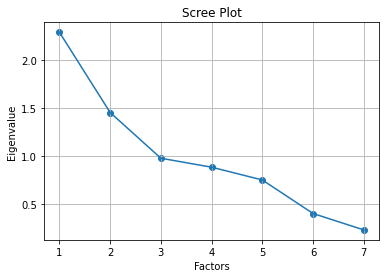

In [ ]:
plt.scatter(range(1,df_scaled.shape[1]+1),eigen_values)
plt.plot(range(1,df_scaled.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa.set_params(n_factors= 3, rotation='varimax')

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
fa.fit(df_scaled)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

**26. Рассчитайте значения факторов на основе стандартизированных данных, воспользовавшись функцией fit_transform(). Результат представьте в виде таблицы, в названии столбцов которой содержится указание на номер фактора. Выведите на экран первые 5 строк.**

# ***!!! Факторный анализ применяем когда хотим изменить размерность, когда много признаков***

In [ ]:
loadings=pd.DataFrame(fa.loadings_,columns=['factor_1','factor_2','factor_3'],index=df.columns)
loadings
# расчет значений 3-х факторов

,factor_1,factor_2,factor_3
LUNGES,0.020596,0.923369,-0.088005
BITES,0.025510,0.725449,0.506470
ZIGZAGS,0.333253,-0.025142,0.102150
NEST,1.098768,0.294280,-0.207674
SPINES,-0.023654,-0.002614,0.569932
DNEST,0.514111,-0.028053,-0.123253
BOUT,-0.322658,0.140623,-0.098515


In [ ]:
fa.set_params(n_factors= 2, rotation='varimax')

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [ ]:
fa.fit(df_scaled)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [ ]:
loadings=pd.DataFrame(fa.loadings_,columns=['factor_1','factor_2'],index=df.columns)
loadings

,factor_1,factor_2
LUNGES,0.623123,-0.242540
BITES,1.007741,-0.128163
ZIGZAGS,0.000196,0.355506
NEST,-0.015454,0.894196
SPINES,0.294315,0.018574
DNEST,-0.155512,0.536576
BOUT,0.099458,-0.384636


In [ ]:
fa.get_communalities()

array([0.447, 1.032, 0.126, 0.8  , 0.087, 0.312, 0.158])

In [ ]:
fa.get_uniquenesses()

array([ 0.553, -0.032,  0.874,  0.2  ,  0.913,  0.688,  0.842])

In [ ]:
fa.get_communalities()+fa.get_uniquenesses()

array([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
var=pd.DataFrame(fa.get_factor_variance(),columns=['factor_1','factor_2'],index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])
var

,factor_1,factor_2
SS Loadings,1.524760,1.437427
Proportion Var,0.217823,0.205347
Cumulative Var,0.217823,0.423170


In [ ]:
scores=pd.DataFrame(fa.fit_transform(df_scaled),columns=['factor_1','factor_2'])
scores.head()

,factor_1,factor_2
0,-1.056267,-0.414067
1,-0.312892,-0.554501
2,-0.914928,-0.217825
3,1.815168,-0.179745
4,0.413355,3.843151


In [ ]:
scores.corr()

,factor_1,factor_2
factor_1,1.000000,-0.004571
factor_2,-0.004571,1.000000
